## Analysing results

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
folder_path = r"C:\Users\camer\Documents\Masters Thesis\Data\Testing data\AWS testing data"

In [45]:
traders = ["1 - ZIC", "2 - ZIP", "3 - GDX", "4 - AA",  "5 - GVWY", "6 - SHVR"]
# traders = ["ZIC - 1", "ZIP - 2", "GDX - 3", "AA - 4",  "GVWY - 5", "SHVR - 6"]

column_names = [
    'Trial_Number',
    'Trader_Type_1', 'Total_Profit_1', 'Num_Traders_1', 'Profit_per_trader_1', 'Trades_Per_Trader_1', 'Time_1_1', 'Time_2_1',
    'Trader_Type_2', 'Total_Profit_2', 'Num_Traders_2', 'Profit_per_trader_2', 'Trades_Per_Trader_2', 'Time_1_2', 'Time_2_2'
]

for trader in traders:
    full_folder_path = os.path.join(folder_path, trader)
    result_files = [file for file in os.listdir(full_folder_path) if file.endswith('.csv')]
    
    trader_results = []
    
    for result_file in result_files:
        file_path = os.path.join(full_folder_path, result_file)
        results = pd.read_csv(file_path, header=None)
        trader_results.append(results)
    ttype_results = pd.concat(trader_results, ignore_index=True)
    ttype_results.columns = column_names
    
    output_file = os.path.join(folder_path, f"{trader}.csv")
    ttype_results.to_csv(output_file, index=False)
    

In [8]:
file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\6 - SHVR.csv'
pairwise_test_df = pd.read_csv(file_path)

pairwise_test_df['Winner'] = np.where(pairwise_test_df['Profit_per_trader_1'] > pairwise_test_df['Profit_per_trader_2'], pairwise_test_df['Trader_Type_1'], pairwise_test_df['Trader_Type_2'])

print(pairwise_test_df.value_counts('Winner'))

Winner
 DFBA    11450
 SHVR     7550
Name: count, dtype: int64


In [46]:
trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    pairwise_test_df = pd.read_csv(file_path)
#     pairwise_test_df = pairwise_test_df[
#         (pairwise_test_df['Total_Profit_1'] != 0) & 
#         (pairwise_test_df['Total_Profit_2'] != 0)
#     ]
    pairwise_test_df['Winner'] = np.where(
        pairwise_test_df['Profit_per_trader_1'] > pairwise_test_df['Profit_per_trader_2'],
        pairwise_test_df['Trader_Type_1'],
        pairwise_test_df['Trader_Type_2']
    )
    
    winner_counts = pairwise_test_df['Winner'].value_counts()

    print(f"Results for {trader_file}:")
    for winner, count in winner_counts.items():
        print(f"'{winner}' occurred {count} times.")
    print()

Results for 1 - ZIC.csv:
' DFBA' occurred 13774 times.
' ZIC' occurred 476 times.

Results for 2 - ZIP.csv:
' ZIP' occurred 9639 times.
' DFBA' occurred 4611 times.

Results for 3 - GDX.csv:
' DFBA' occurred 9768 times.
' GDX' occurred 4482 times.

Results for 4 - AA.csv:
' DFBA' occurred 10244 times.
' AA' occurred 4006 times.

Results for 5 - GVWY.csv:
' GVWY' occurred 12337 times.
' DFBA' occurred 1913 times.

Results for 6 - SHVR.csv:
' SHVR' occurred 11042 times.
' DFBA' occurred 3208 times.



267
37
26
1011
2
78


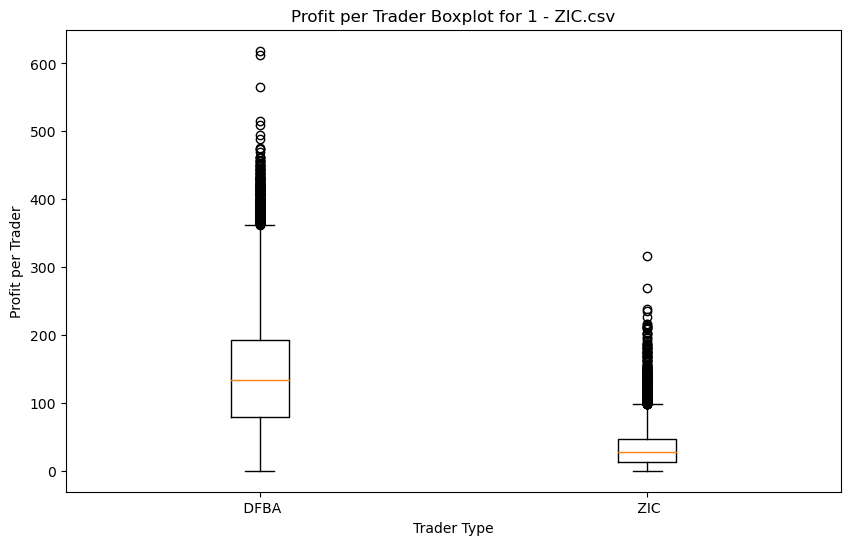

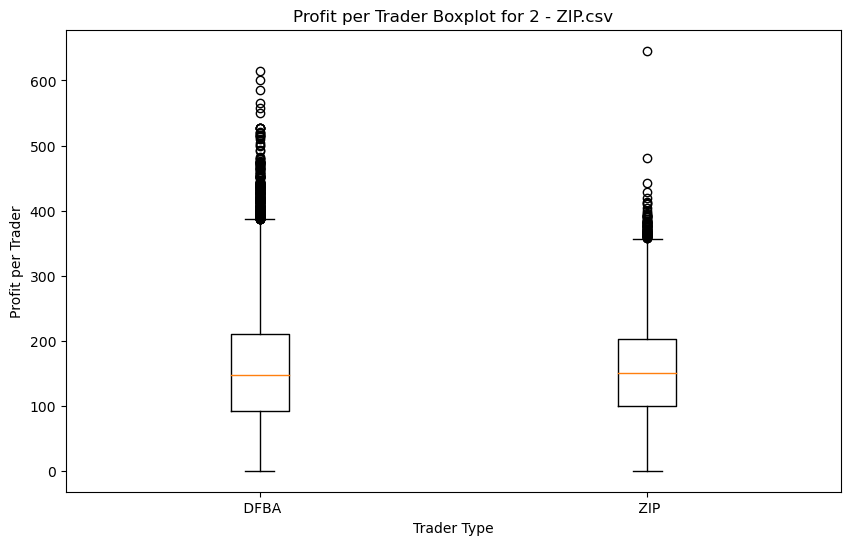

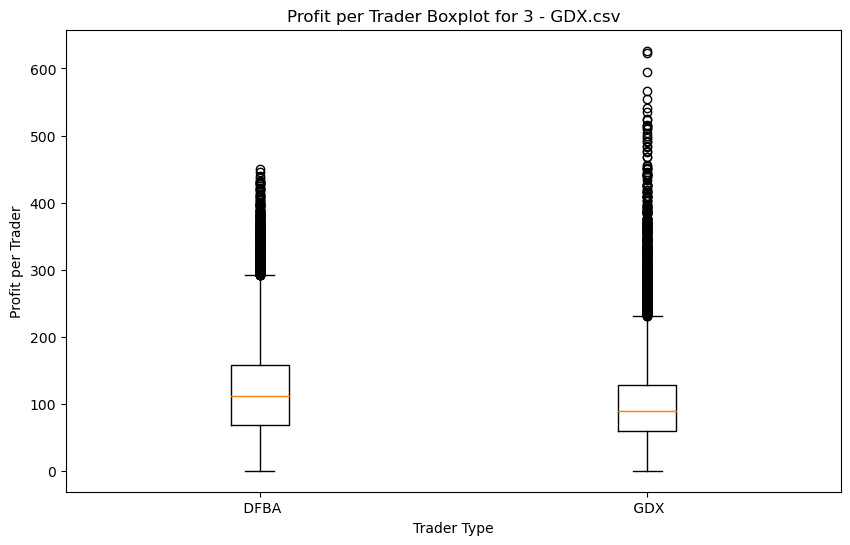

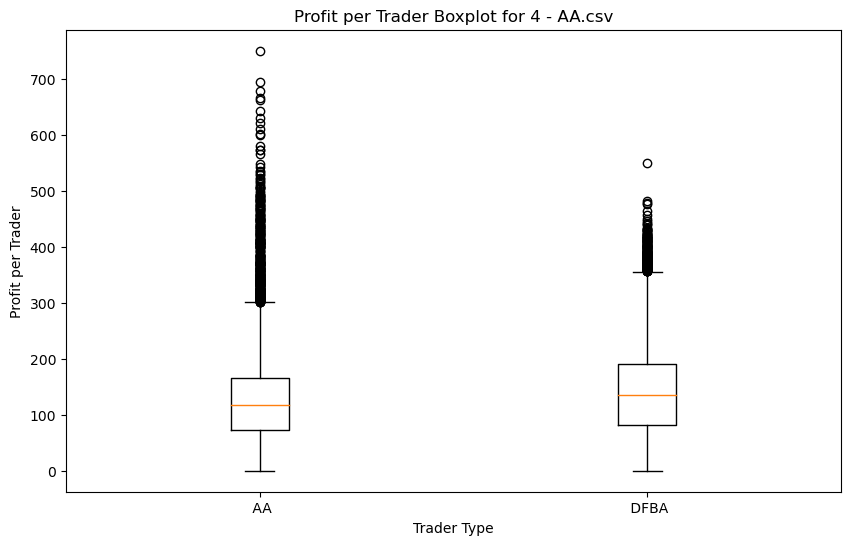

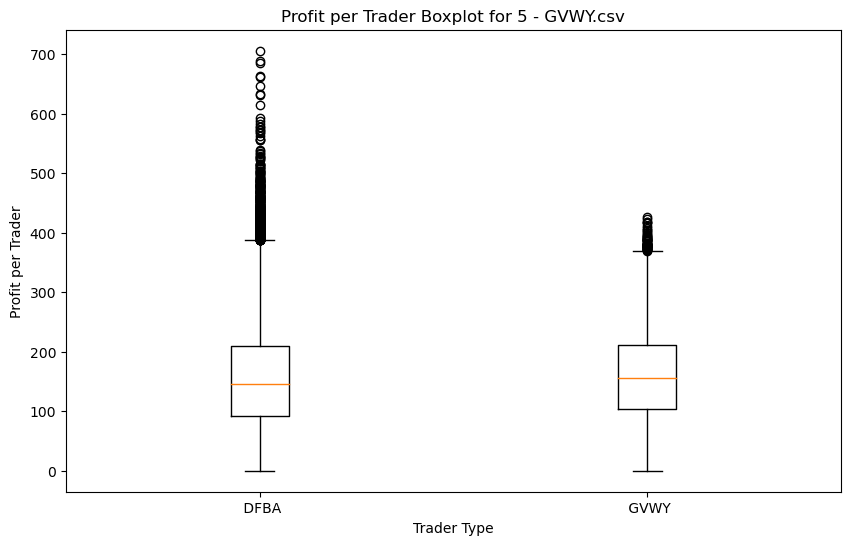

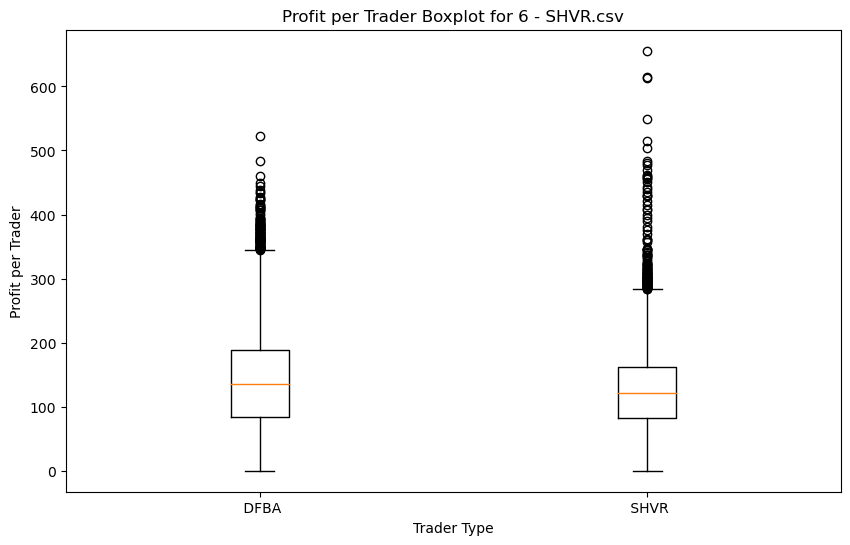

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

trader_files = [f'1 - ZIC.csv', '2 - ZIP.csv', '3 - GDX.csv', '4 - AA.csv', '5 - GVWY.csv', '6 - SHVR.csv']

for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    
    df = pd.read_csv(file_path)
    zeros_df = df[
        (df['Total_Profit_1'] == 0) & 
        (df['Total_Profit_2'] == 0)
    ]

    print(len(zeros_df))
    
#     df = df[
#         (df['Total_Profit_1'] != 0) & 
#         (df['Total_Profit_2'] != 0)
#     ]
    

    trader_columns = [col for col in df.columns if 'Trader_Type' in col]
    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]
    
    data = []
    labels = []
    
    for trader_col, profit_col in zip(trader_columns, profit_columns):
        data.append(df[profit_col])
        labels.append(df[trader_col].iloc[0])

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)

    plt.title(f'Profit per Trader Boxplot for {trader_file}')
    plt.xlabel('Trader Type')
    plt.ylabel('Profit per Trader')
    

In [41]:
zeros_df = df[
        (df['Total_Profit_1'] == 0) & 
        (df['Total_Profit_2'] == 0)
    ]

len(zeros_df)

78

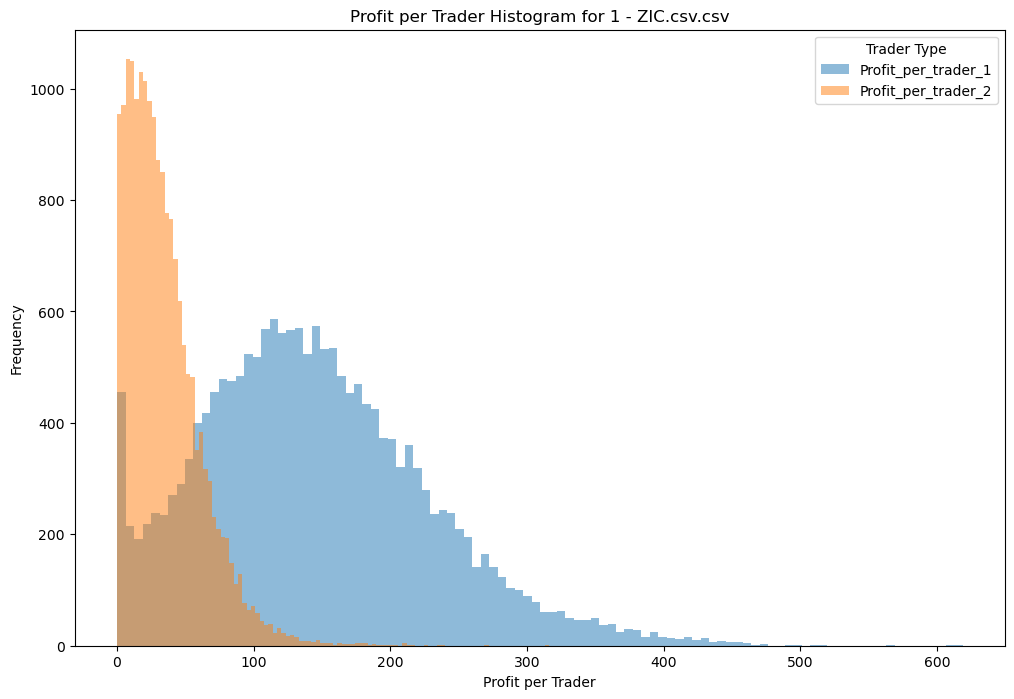

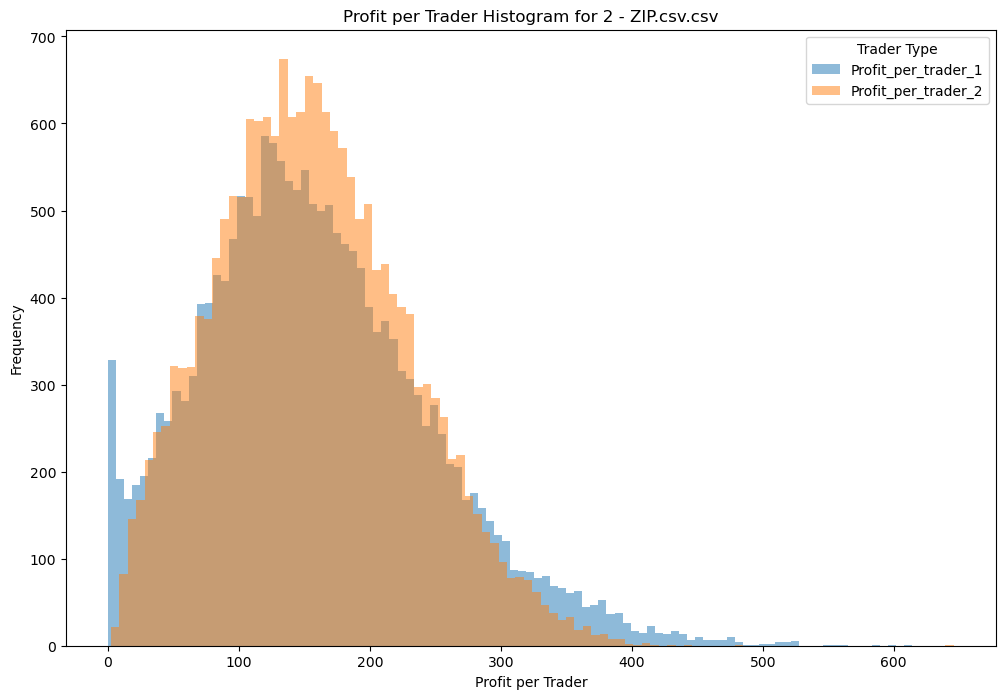

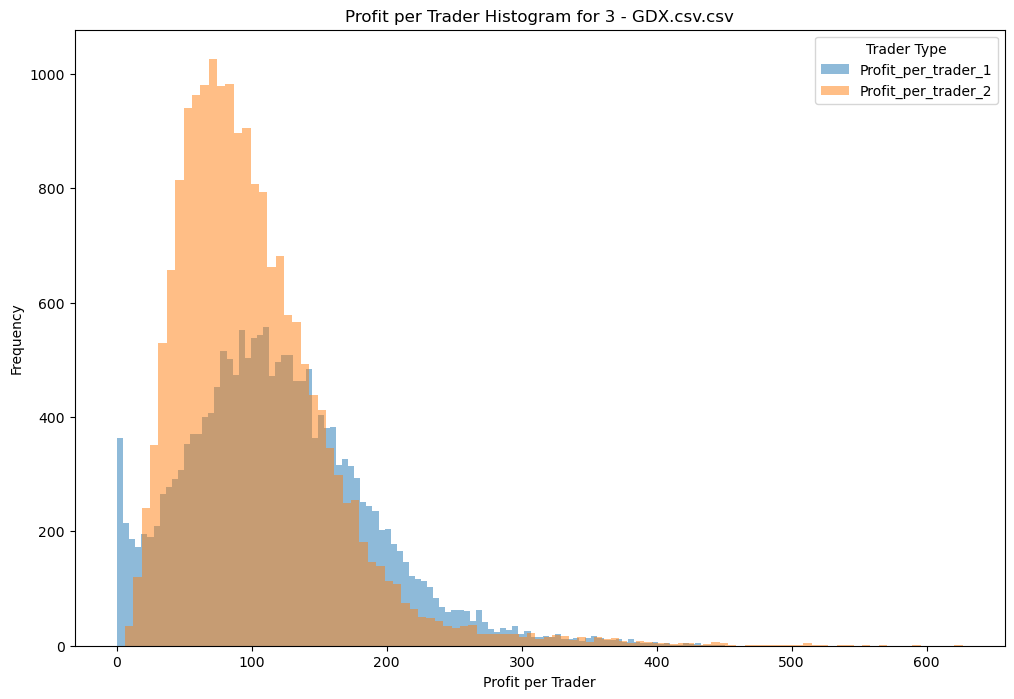

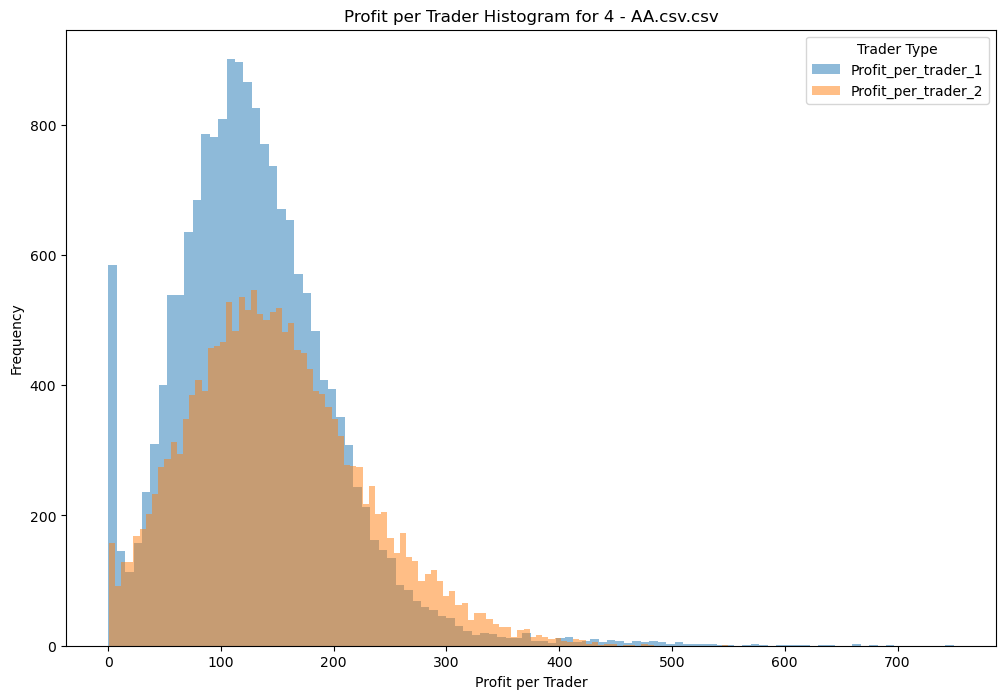

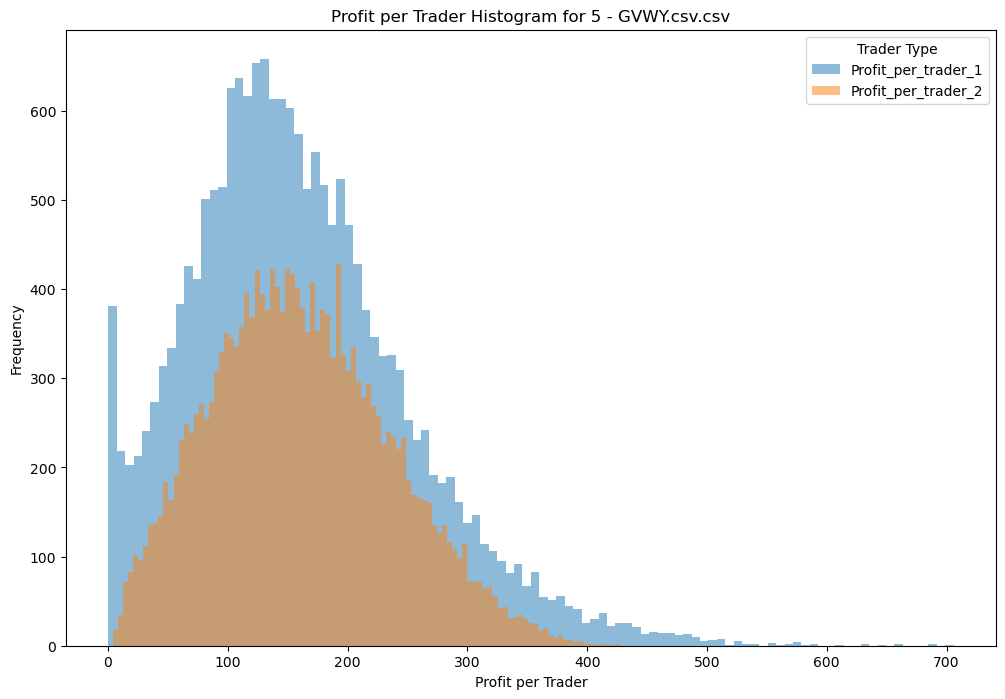

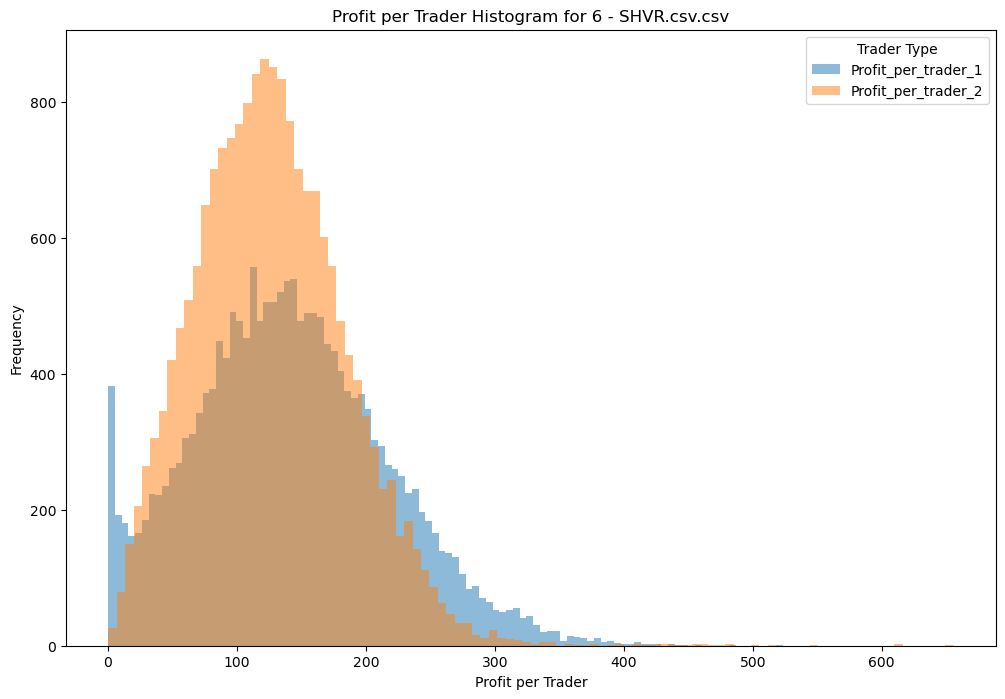

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\camer\Documents\Masters Thesis\Data\Testing data\DFBA2 1secbatch 30sec customer order\2 - ZIP.csv'
for trader_file in trader_files:
    file_path = os.path.join(folder_path, trader_file)
    df = pd.read_csv(file_path)

    df = df[
            (df['Total_Profit_1'] != 0) & 
            (df['Total_Profit_2'] != 0)
        ]

    profit_columns = [col for col in df.columns if 'Profit_per_trader' in col]

    plt.figure(figsize=(12, 8))

    for profit_col in profit_columns:
        plt.hist(df[profit_col], bins=100, alpha=0.5, label=profit_col)

    plt.title(f'Profit per Trader Histogram for {trader_file}.csv')
    plt.xlabel('Profit per Trader')
    plt.ylabel('Frequency')
    plt.legend(title='Trader Type')

    plt.show()



In [36]:
poor_aa = df[
        (df['Total_Profit_1'] <= 10)
    ]

In [38]:
poor_aa

,Trial_Number,Trader_Type_1,Total_Profit_1,Num_Traders_1,Profit_per_trader_1,Trades_Per_Trader_1,Time_1_1,Time_2_1,Trader_Type_2,Total_Profit_2,Num_Traders_2,Profit_per_trader_2,Trades_Per_Trader_2,Time_1_2,Time_2_2
6,trial0000157,AA,8.0,2,4.00,0.50,1.470000e-05,3.830000e-06,DFBA,15.0,38,0.39,0.03,0.029320,0.000001
32,trial0000183,AA,4.0,2,2.00,0.50,1.607000e-05,4.060000e-06,DFBA,846.0,38,22.26,1.29,0.027787,0.000001
85,trial0000186,AA,7.0,2,3.50,0.50,1.598000e-05,4.060000e-06,DFBA,689.0,38,18.13,1.13,0.027281,0.000001
99,trial0000200,AA,5.0,2,2.50,0.50,1.626000e-05,4.210000e-06,DFBA,491.0,38,12.92,0.87,0.028985,0.000001
122,trial0000173,AA,6.0,2,3.00,0.50,1.548000e-05,4.050000e-06,DFBA,122.0,38,3.21,0.24,0.029042,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18621,trial0005572,AA,9.5,38,0.25,0.03,1.110000e-06,3.700000e-07,DFBA,21.5,2,10.75,0.50,0.012928,0.000001
18626,trial0005577,AA,9.0,38,0.24,0.05,8.930000e-06,2.880000e-06,DFBA,52.0,2,26.00,1.00,0.015840,0.000001
18751,trial0005552,AA,6.0,38,0.16,0.03,1.420000e-06,4.600000e-07,DFBA,30.0,2,15.00,0.50,0.018704,0.000001
18857,trial0005558,AA,2.0,38,0.05,0.03,2.500000e-07,8.000000e-08,DFBA,23.0,2,11.50,0.50,0.041330,0.000001
